<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Beta_Hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2015-01-01'

asset = yf.download('TSLA', start=start, end=end)['Adj Close']
benchmark = yf.download('SPY', start=start, end=end)['Adj Close']

r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


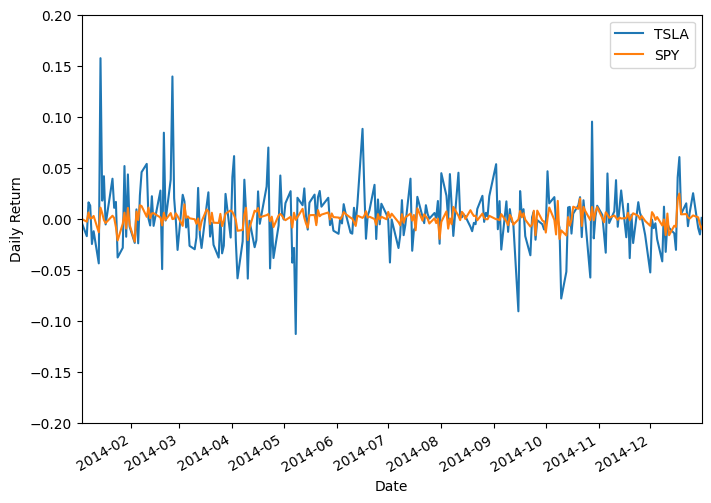

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
r_a.plot(ax=ax)
r_b.plot(ax=ax)
ax.legend(['TSLA', 'SPY'])
ax.set(
    xlabel='Date',
    ylabel='Daily Return',
    ylim=[-0.2, 0.2],
    xlim=[r_b.index[0], r_b.index[-1]]
)
plt.show()

In [10]:
# Regression to find the model parameters
X = r_b.values
y = r_a.values

def linreg(X, y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(y, X).fit()
    # X = X[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X, y)
print(f'Alpha: {alpha}')
print(f'Beta: {beta}')

Alpha: 0.0009171470024008462
Beta: 1.954167025053387


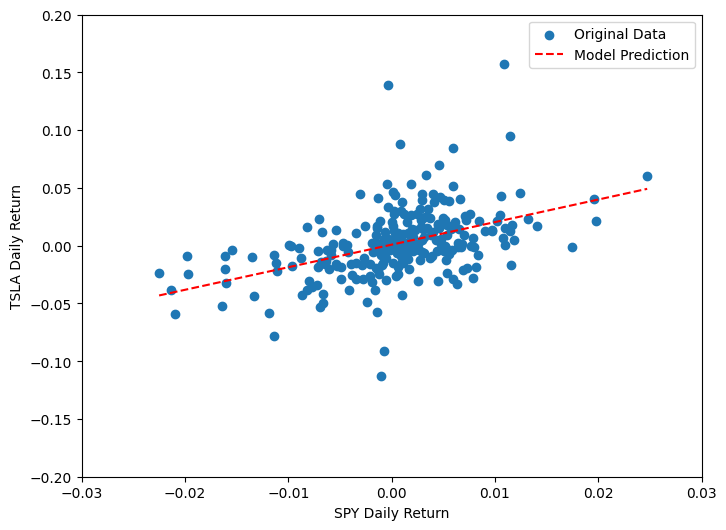

In [15]:
X2 = np.linspace(X.min(), X.max(), 100)
yhat = X2 * beta + alpha

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, label='Original Data')
ax.plot(X2, yhat, '--', c='r', label='Model Prediction')
ax.set(
    xlabel='SPY Daily Return',
    ylabel='TSLA Daily Return',
    xlim=[-0.03, 0.03],
    ylim=[-0.2, 0.2]
)
ax.legend()
plt.show()

## Hedging

In [ ]:
portfolio = -1 * beta * r_b + r_a
portfolio.name = 'TSLA + Hedge'

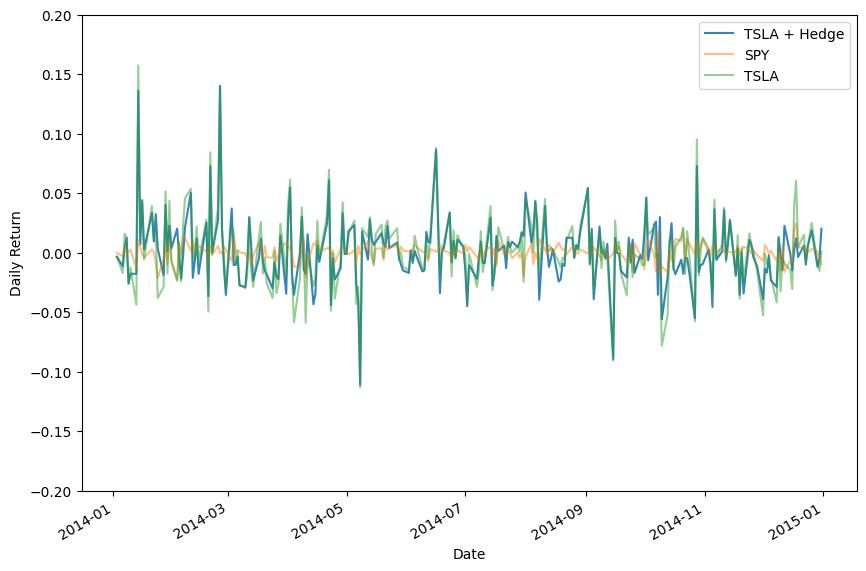

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
portfolio.plot(alpha=0.9, ax=ax)
r_b.plot(alpha=0.5, ax=ax)
r_a.plot(alpha=0.5, ax=ax)
ax.set_ylabel('Daily Return')
ax.set_ylim([-0.2, 0.2])
ax.legend(['TSLA + Hedge', 'SPY', 'TSLA'])
plt.show()

In [18]:
print(f'Means: {portfolio.mean(), r_a.mean()}')
print(f'Volatilities: {portfolio.std(), r_a.std()}')

Means: (0.0009171470024008457, 0.0020245307643899256)
Volatilities: (0.0271902734266581, 0.030498015968074547)


In [22]:
p = portfolio.values
alpha, beta = linreg(X, p)
print(f'alpha: {alpha}')
print(f'beta: {beta}')

alpha: 0.0009171470024008457
beta: -4.787836793695988e-16


In [23]:
start = '2014-01-01'
end = '2015-01-01'

asset = yf.download('TSLA', start=start, end=end)['Adj Close']
benchmark = yf.download('SPY', start=start, end=end)['Adj Close']

r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]
X = r_b.values
y = r_a.values

h_alpha, h_beta = linreg(X, y)
print(f'\nHistorical Estimate')
print(f'alpha: {h_alpha}, beta: {h_beta}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Historical Estimate
alpha: 0.0009171470024008462, beta: 1.954167025053387


In [24]:
start = '2015-01-01'
end = '2015-06-01'

asset = yf.download('TSLA', start=start, end=end)['Adj Close']
benchmark = yf.download('SPY', start=start, end=end)['Adj Close']

r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]
X = r_b.values
y = r_a.values

alpha, beta = linreg(X, y)
print(f'\nOut of sample')
print(f'alpha: {alpha}, beta: {beta}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Out of sample
alpha: 0.001196321054864183, beta: 1.0348243457431947


In [25]:
portfolio = -1 * h_beta * r_b + r_a
p = portfolio.values
alpha, beta = linreg(X, p)
print(f'\nOut of sample hedge')
print(f'alpha: {alpha}, beta: {beta}')


Out of sample hedge
alpha: 0.0011963210548641828, beta: -0.9193426793101932


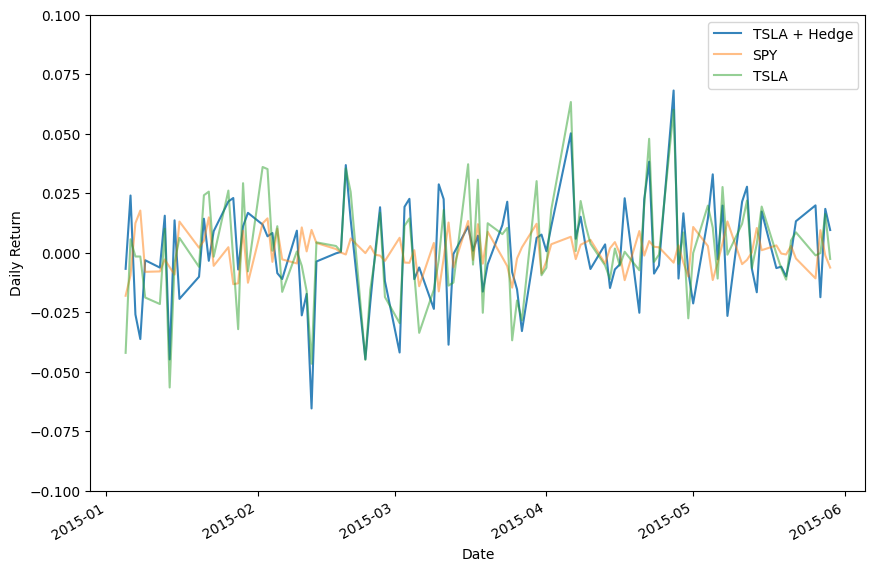

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
portfolio.plot(alpha=0.9, ax=ax)
r_b.plot(alpha=0.5, ax=ax)
r_a.plot(alpha=0.5, ax=ax)
ax.set_ylabel('Daily Return')
ax.set_ylim([-0.1, 0.1])
ax.legend(['TSLA + Hedge', 'SPY', 'TSLA'])
plt.show()

In [29]:
0.9193426793101932 * 2

1.8386853586203864